# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [ ]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-04-02 20:32:20--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-04-02 20:32:21--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip’

cus

In [ ]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


In [ ]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [ ]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


Edad: Ayuda a entender el ciclo de vida del cliente, sus preferencias y sus necesidades. Por ejemplo, los jóvenes pueden estar más interesados en tecnología, mientras que los mayores pueden valorar productos relacionados con la salud.

Género: Permite ajustar la oferta de productos o servicios a las preferencias de cada género, aunque es importante no generalizar demasiado.

## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [ ]:
print("Cantidad de valores nulos por columna:")
print(df.isnull().sum())

Cantidad de valores nulos por columna:
invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


In [ ]:
ninguna variable presenta problemas

## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [ ]:

df['total_value'] = df['quantity'] * df['price']
df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_value
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


In [ ]:
df['total invoice']=df['quantity'] * df['price']
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_value,total invoice
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,242.40


In [ ]:
bins_totalinvoice = [0, 100, 200, 300, 400, 500]
labels_totalinvoice = ['0-100', '101-200', '201-300', '301-400', '401-500']

df['total invoice_group'] = pd.cut(df['total invoice'],bins=bins_totalinvoice, labels=labels_totalinvoice)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_value,total invoice,total invoice_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,7502.00,NaN
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,5401.53,NaN
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,300.08,301-400
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,15004.25,NaN
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,242.40,201-300


In [ ]:
bins_edad = [18,43,56,69]
labels_edad = ['Joven', 'Adulto', 'Mayor']
df['age_group'] = pd.cut(df['age'], bins=bins_edad, labels=labels_edad)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_value,total invoice,total invoice_group,age_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,7502.00,NaN,Joven
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,5401.53,NaN,Joven
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,300.08,301-400,Joven
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,15004.25,NaN,Mayor
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,242.40,201-300,Adulto


Ingresos: Es clave para determinar la capacidad de compra del cliente, lo cual afecta las estrategias de precios, ofertas y productos.

Nivel educativo: Puede influir en las preferencias y en la forma en que los clientes perciben productos o servicios.

## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

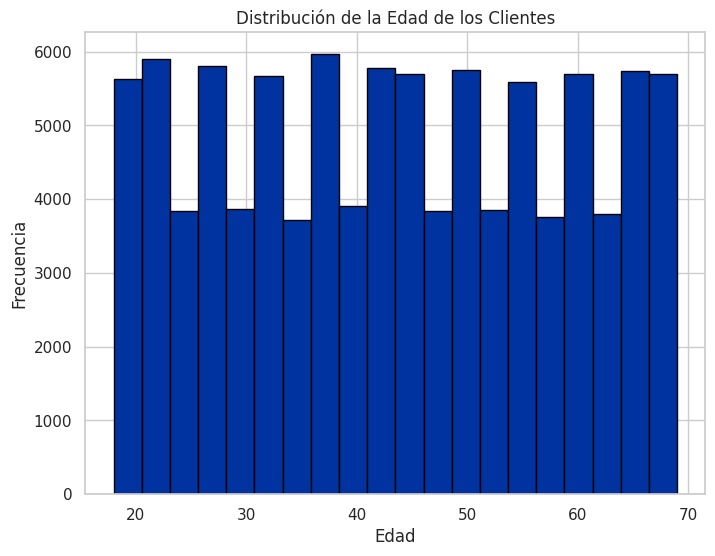

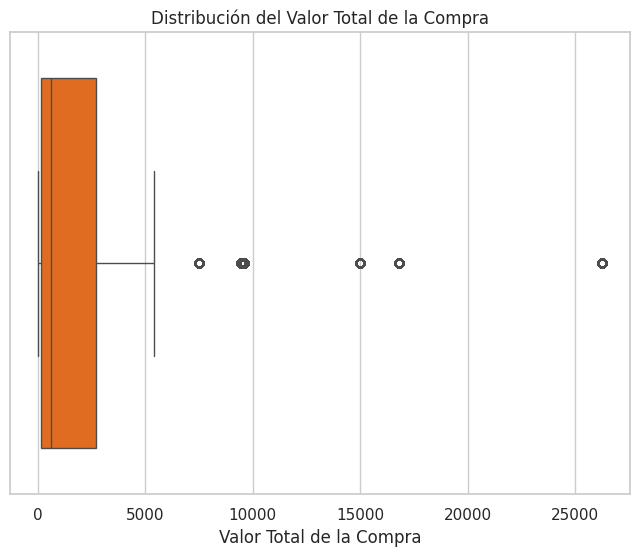

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, color=corporate_colors[0], edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad de los Clientes')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['total_value'], color=corporate_colors[1])
plt.xlabel('Valor Total de la Compra')
plt.title('Distribución del Valor Total de la Compra')
plt.show()


la mayoria de personas comparan muy similar eso significa que no hay  un patron en las ventas

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

<ipython-input-12-d3eacba52177>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segments = df.groupby(['age_group', 'gender'])['customer_id'].nunique().unstack()


gender     Female   Male
age_group               
Joven       28840  19390
Adulto      14815   9897
Mayor       14748   9923


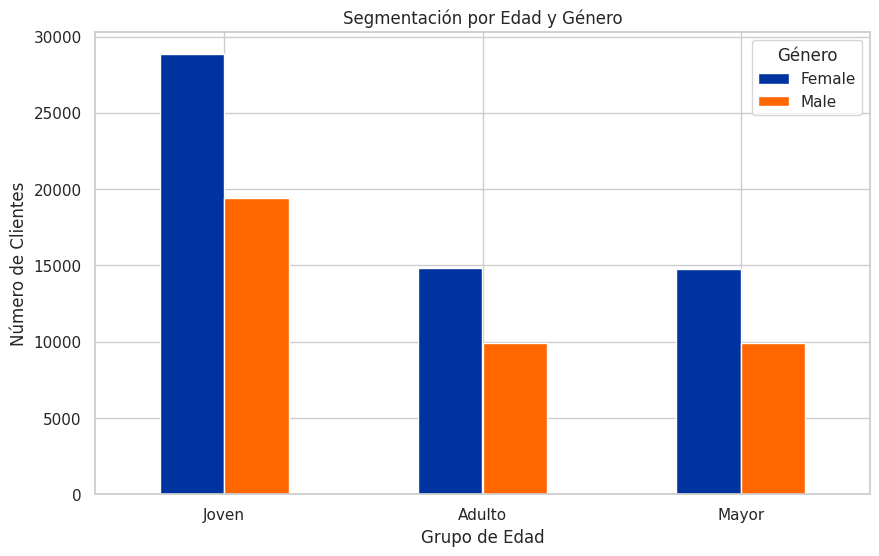

In [ ]:

import matplotlib.pyplot as plt
segments = df.groupby(['age_group', 'gender'])['customer_id'].nunique().unstack()
print(segments)

segments.plot(kind='bar', figsize=(10, 6), color=[corporate_colors[0], corporate_colors[1]])
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Clientes')
plt.title('Segmentación por Edad y Género')
plt.xticks(rotation=0)
plt.legend(title='Género')
plt.show()


Segmentar a los clientes en función de la edad y el género es una estrategia común para dirigir campañas específicas, ya que ambos factores tienen un gran impacto en las preferencias de productos, comportamientos de compra y las respuestas a las campañas de marketing.

## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

Segmentos por categoría de producto:
 category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: customer_id, dtype: int64


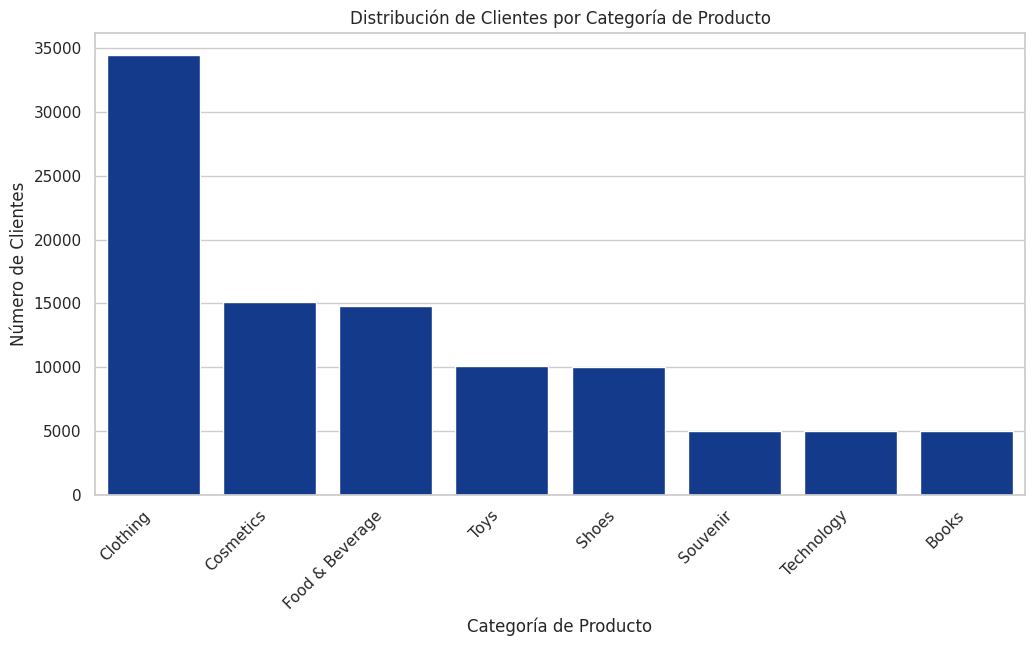


Segmentos por método de pago:
 payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: customer_id, dtype: int64


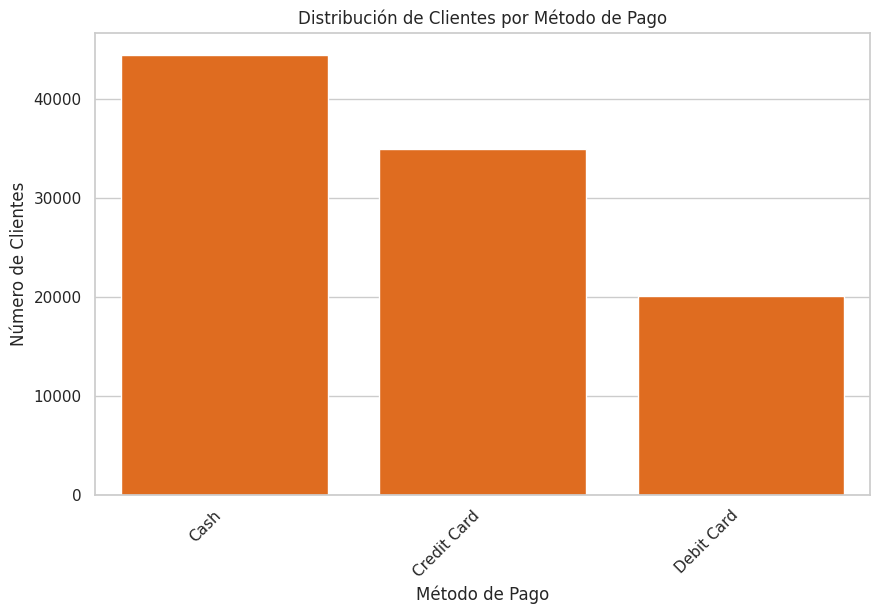


Segmentos por centro comercial:
 shopping_mall
Emaar Square Mall     4811
Viaport Outlet        4914
Forum Istanbul        4947
Cevahir AVM           4991
Zorlu Center          5075
Istinye Park          9781
Metropol AVM         10161
Metrocity            15011
Kanyon               19823
Mall of Istanbul     19943
Name: customer_id, dtype: int64


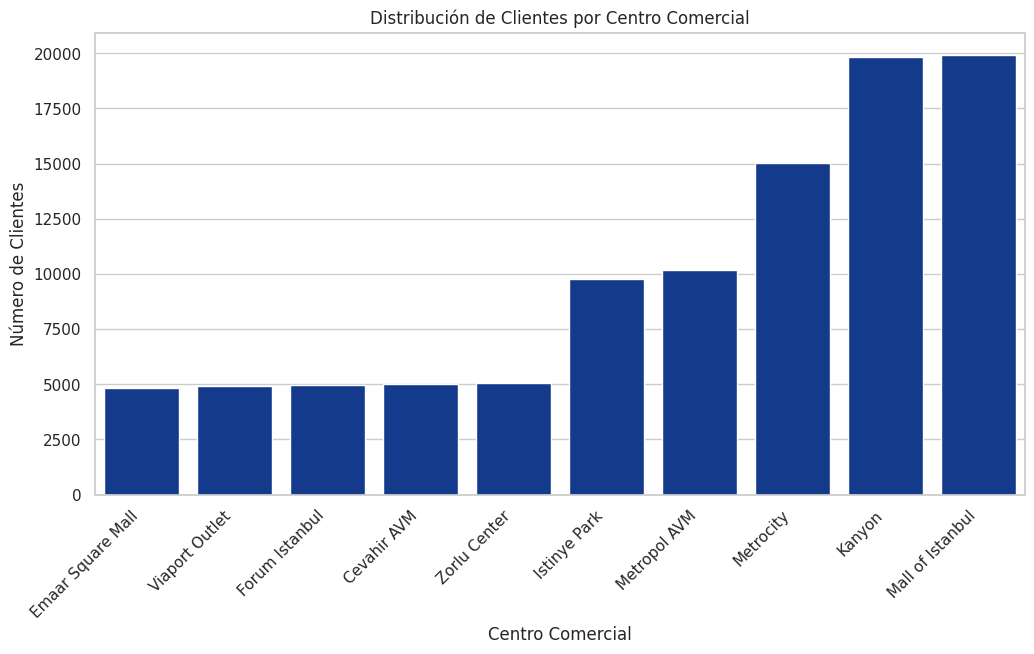


Segmentos combinados:
 category    payment_method  shopping_mall   
Souvenir    Debit Card      Zorlu Center          40
                            Viaport Outlet        45
Books       Debit Card      Zorlu Center          46
Technology  Debit Card      Viaport Outlet        46
Souvenir    Debit Card      Cevahir AVM           48
                                                ... 
Clothing    Cash            Metrocity           2284
            Credit Card     Kanyon              2395
                            Mall of Istanbul    2404
            Cash            Kanyon              3012
                            Mall of Istanbul    3116
Name: customer_id, Length: 240, dtype: int64


In [ ]:

import matplotlib.pyplot as plt

category_segments = df.groupby(['category'])['customer_id'].nunique().sort_values(ascending=False)
print("Segmentos por categoría de producto:\n", category_segments)


plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df, order=category_segments.index, color=corporate_colors[0])
plt.xlabel('Categoría de Producto')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Clientes por Categoría de Producto')
plt.xticks(rotation=45, ha='right')
plt.show()


payment_method_segments = df.groupby(['payment_method'])['customer_id'].nunique().sort_values(ascending=False)
print("\nSegmentos por método de pago:\n", payment_method_segments)


plt.figure(figsize=(10, 6))
sns.countplot(x='payment_method', data=df, order=payment_method_segments.index, color=corporate_colors[1])
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Clientes por Método de Pago')
plt.xticks(rotation=45, ha='right')
plt.show()



shopping_mall_segments = df.groupby(['shopping_mall'])['customer_id'].nunique().sort_values()
print("\nSegmentos por centro comercial:\n", shopping_mall_segments)


plt.figure(figsize=(12, 6))
sns.countplot(x='shopping_mall', data=df, order=shopping_mall_segments.index, color=corporate_colors[0])
plt.xlabel('Centro Comercial')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Clientes por Centro Comercial')
plt.xticks(rotation=45, ha='right')
plt.show()

combined_segments = df.groupby(['category','payment_method','shopping_mall'])['customer_id'].nunique().sort_values()
print("\nSegmentos combinados:\n", combined_segments)


 El comportamiento de compra de los clientes es un factor crucial para desarrollar una estrategia de marketing eficaz. De las diversas variables que se pueden considerar, algunas tienen un mayor impacto en la forma en que se puede diseñar una campaña

## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

<ipython-input-14-cdc6ad9751bb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_segments = df.groupby(['age_group', 'category'])['customer_id'].nunique().unstack()


category   Books  Clothing  Cosmetics  Food & Beverage  Shoes  Souvenir  \
age_group                                                                 
Joven       2381     16711       7253             7225   4834      2428   
Adulto      1252      8575       3804             3615   2519      1211   
Mayor       1242      8555       3773             3655   2510      1252   

category   Technology  Toys  
age_group                    
Joven            2464  4934  
Adulto           1232  2504  
Mayor            1211  2473  


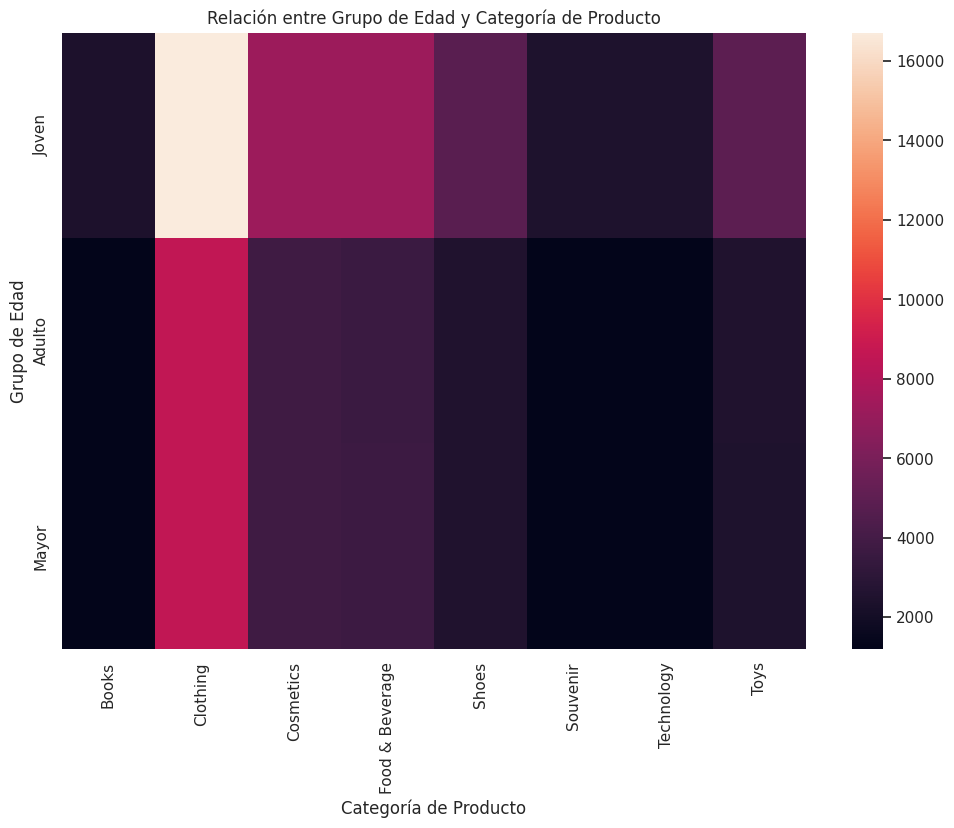

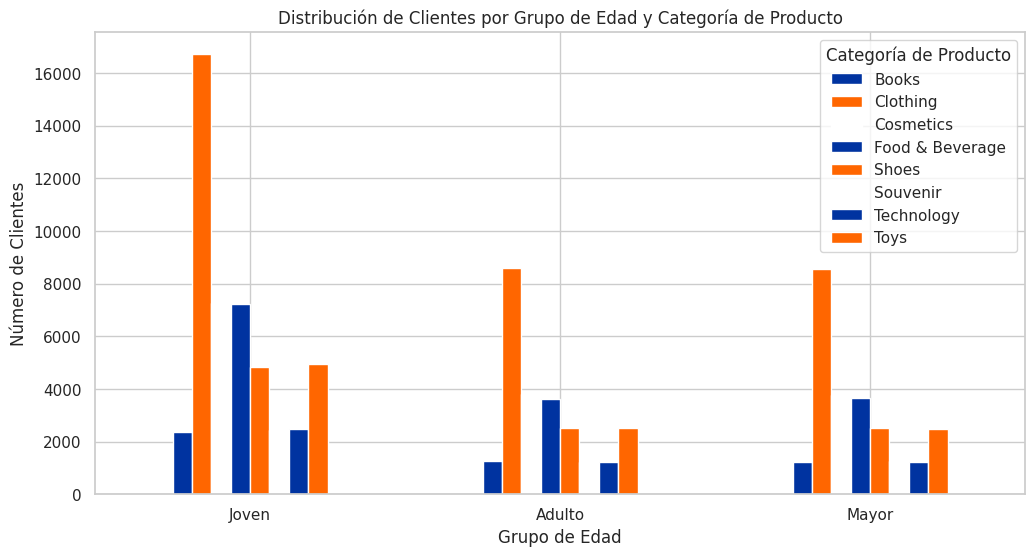

In [ ]:

age_category_segments = df.groupby(['age_group', 'category'])['customer_id'].nunique().unstack()

print(age_category_segments)

plt.figure(figsize=(12, 8))
sns.heatmap(age_category_segments)
plt.xlabel('Categoría de Producto')
plt.ylabel('Grupo de Edad')
plt.title('Relación entre Grupo de Edad y Categoría de Producto')
plt.show()

age_category_segments.plot(kind='bar', figsize=(12, 6), color=corporate_colors)
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Clientes por Grupo de Edad y Categoría de Producto')
plt.xticks(rotation=0)
plt.legend(title='Categoría de Producto')
plt.show()



## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

agruparia categoria de juguetes por sección

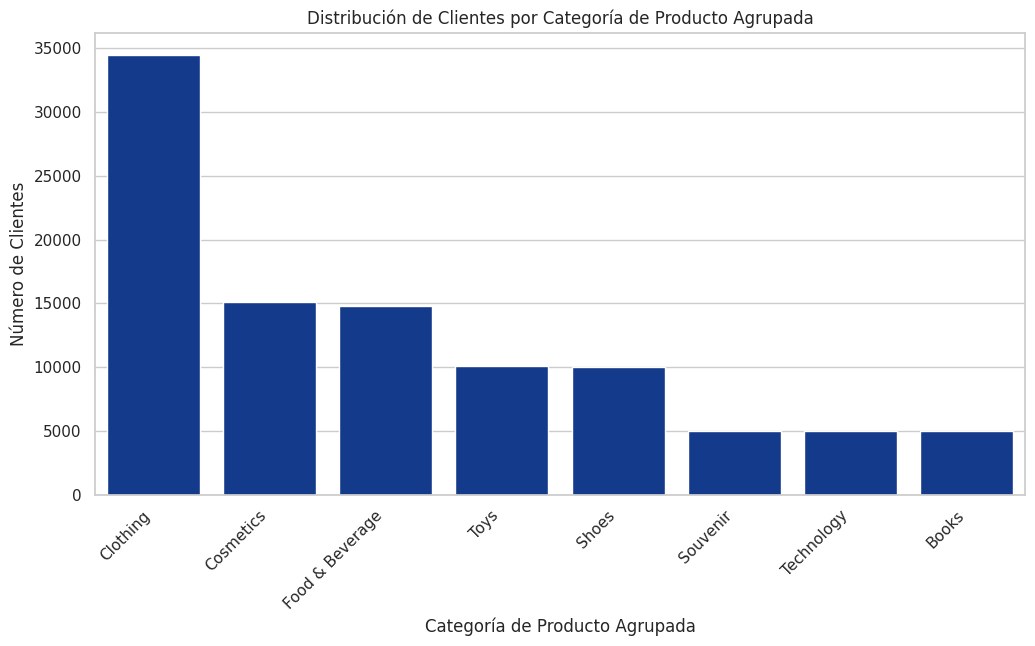

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='category',data=df,order=category_segments.index, color=corporate_colors[0])
plt.xlabel('Categoría de Producto Agrupada')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Clientes por Categoría de Producto Agrupada')
plt.xticks(rotation=45, ha='right')
plt.show()


Juguetes/Entretenimiento: Unir "Juguetes educativos", "Juguetes para bebés", "Muñecas" y "Juguetes de acción" para consolidar categorías con bajo volumen de ventas.

## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

combined_segment
Joven_Clothing            16711
Adulto_Clothing            8575
Mayor_Clothing             8555
Joven_Cosmetics            7253
Joven_Food & Beverage      7225
Joven_Toys                 4934
Joven_Shoes                4834
Adulto_Cosmetics           3804
Mayor_Cosmetics            3773
Mayor_Food & Beverage      3655
Adulto_Food & Beverage     3615
Adulto_Shoes               2519
Mayor_Shoes                2510
Adulto_Toys                2504
Mayor_Toys                 2473
Joven_Technology           2464
Joven_Souvenir             2428
Joven_Books                2381
Adulto_Books               1252
Mayor_Souvenir             1252
Mayor_Books                1242
Adulto_Technology          1232
Adulto_Souvenir            1211
Mayor_Technology           1211
nan_Clothing                646
nan_Food & Beverage         281
nan_Cosmetics               267
nan_Toys                    176
nan_Shoes                   171
nan_Souvenir                108
nan_Books              

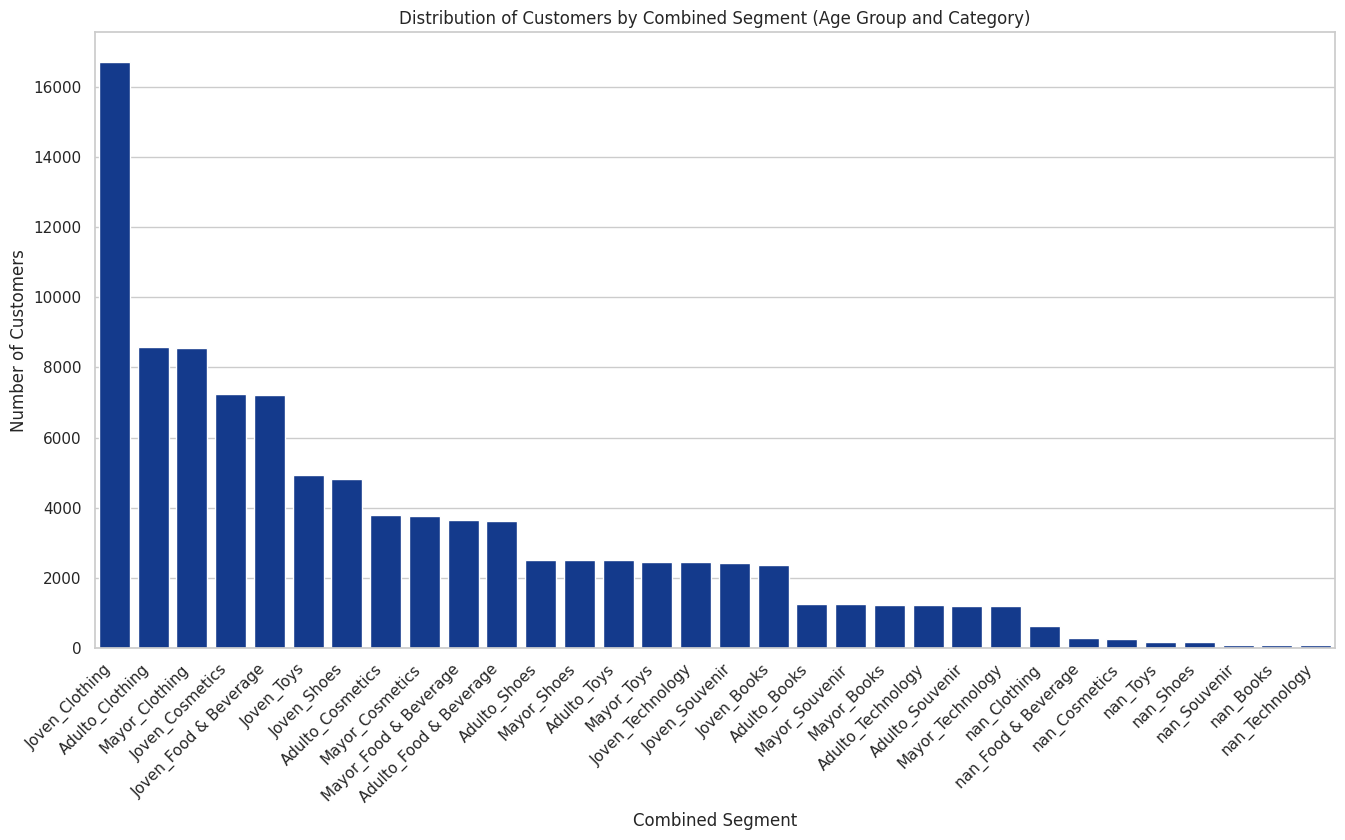

In [ ]:

df['combined_segment'] = df['age_group'].astype(str) + '_' + df['category']

combined_segment_counts = df.groupby('combined_segment')['customer_id'].nunique().sort_values(ascending=False)
print(combined_segment_counts)

plt.figure(figsize=(16, 8))
sns.countplot(x='combined_segment', data=df, order=combined_segment_counts.index, color=corporate_colors[0])
plt.xlabel('Combined Segment')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Combined Segment (Age Group and Category)')
plt.xticks(rotation=45, ha='right')
plt.show()


La combinación de variables que ofrece el perfil más completo para orientar estrategias de marketing sería una mezcla de variables demográficas Estas tres áreas ofrecen una visión integral del cliente, permitiendo personalizar las estrategias de manera efectiva. A continuación, se detallan las variables clave dentro de cada una:

1. Demográficas:
Edad: Permite identificar las necesidades y preferencias relacionadas con el ciclo de vida del cliente (por ejemplo, jóvenes, adultos, mayores).

Género: Ayuda a personalizar productos y mensajes según las preferencias de género, evitando generalizaciones.

Ubicación geográfica: Determina la relevancia de productos según la región, lo cual es clave para segmentar en campañas locales o específicas.

Nivel socioeconómico: Influye en el poder adquisitivo, determinando la capacidad de compra y la forma de abordar las promociones.

## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

In [ ]:
el segmento que mas destaca es la ropa es para jovenes Para potenciar una marca de ropa para jóvenes, es clave tener una identidad clara y conectar con el público a través de redes sociales como Instagram y TikTok, creando contenido atractivo, colaborando con influencers y fomentando el contenido generado por usuarios. La venta debe ser fácil y accesible mediante una tienda online optimizada, live shopping y pop-up stores. Las campañas publicitarias en Meta Ads y TikTok Ads ayudarán a llegar a más clientes, mientras que estrategias como descuentos por primera compra, drops exclusivos y programas de fidelización generarán engagement y repetición de compra. Además, contar historias sobre la marca y analizar constantemente los resultados permitirá optimizar estrategias y adaptarse a las tendencias.

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

In [ ]:
el segmento que mas destaca es la ropa  en general
Para la estrategia de marketing seria segmentos con bajo valor promedio, es clave maximizar el volumen de ventas, optimizar costos y generar fidelización.
 para la influencia de producto La categoría de producto y el centro comercial influyen directamente en el comportamiento de compra tras una reducción de precios, afectando la percepción de valor, la urgencia de compra y la lealtad del consumidor.

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!

los segmentos que tienen potencial es la ropa en todas sus derivadas

estrategia es Para incentivar la compra y fidelización en este segmento, implementaremos una estrategia basada en descuentos por volumen, campañas flash y personalización de ofertas.


para justificar mi elección Esta estrategia combina descuentos estratégicos, urgencia y personalización para incrementar ventas sin afectar la rentabilidad.